In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import komponentów do budowy sieci
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.random import set_seed

In [56]:
set_seed(0)

In [57]:
# tworzenie
model = Sequential()
model.add( Dense(10, input_shape=[1], activation="linear") ) # warstwa wejsc. z deklaracją rozmiaru zmiennej niezależenj i f. aktywacji
model.add( Dense(2, activation="linear") ) # warstwa uktyta
model.add( Dense(1, activation="linear") ) # wartstwa wyjściowa

In [58]:
# kompilacja
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

In [59]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                20        
                                                                 
 dense_16 (Dense)            (None, 2)                 22        
                                                                 
 dense_17 (Dense)            (None, 1)                 3         
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [60]:
df = pd.read_csv("http://51.91.120.89/extras/f-c.csv", usecols=[1,2])
df.head()

,F,C
0,-140.0,-95.55
1,-136.0,-93.33
2,-124.0,-86.66
3,-112.0,-80.00
4,-105.0,-76.11


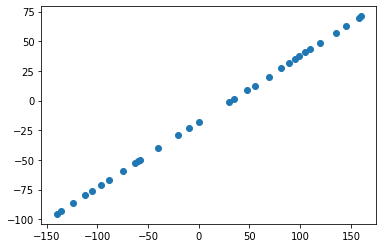

In [61]:
plt.scatter(df.F, df.C)

In [62]:
result = model.fit(df.F, df.C, epochs=1500, verbose=0)

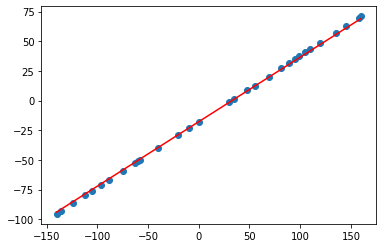

In [63]:
y_pred = model.predict(df.F)
plt.scatter(df.F, df.C)
plt.plot(df.F, y_pred, c='r')


In [64]:
df1 = pd.DataFrame( result.history )
df1.head(10)

,loss,mae
0,1309.766357,29.903528
1,1119.745483,27.492002
2,1001.839355,25.930193
3,913.800476,24.703897
4,842.959167,23.700977
5,783.598145,22.808640
6,732.586670,22.064833
7,688.000488,21.420965
8,648.561218,20.857367
9,613.370178,20.392452


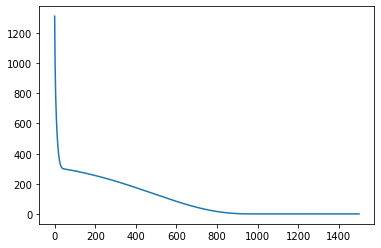

In [65]:
df1.loss.plot()

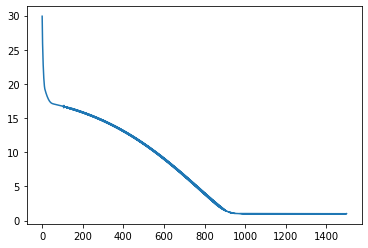

In [66]:
df1.mae.plot()